실기 시험



#### - 서울 인구 데이터, www.mois.go.kr/정책자료/통계/주민등록 인구통계/연령별 인구현황/통계표 탭

1. 30세 이하의 인구 비율이 가장 높은 도시 5개를 찾고, 도시 이름과 인구수를 그래프로 나타내세요.


#### - 지하철 시간대별 승하차 데이터, 티머니 홈페이지/이용안내/대중교통 통계자료/최근 월간 교통카드 통계자료

2. 선릉역과 삼성역에서 아침8~9시에 하차하는 인구수의 합을 구하세요



3. 시간대별로 삼성역과 선릉역의 지하철 승하차 현황을 그래프로 표현하세요. 

   총 4개의 그래프를 겹쳐서 그립니다. 

   삼성역의 승차 그래프, 삼성역의 하차 그래프, 선릉역의 승차 그래프, 선릉역의 하차 그래프)



#### -  유무임 승하차 데이터

4. 유임 승차에 비해 무임 승차 인원의 비율이 높은 지하철역 5개의 이름과 비율을 그래프로 나타내세요.



#### - 웹 데이터 획득하기 

5. 네이버 금융/국내 증시/시가총액/코스피 에서 상위 종목 50개 데이터를 획득합니다. 오전 9시이후에 나타납니다

   (현재는 1. 삼성전자 2. SK 하이닉스 3.삼성전자우 4.현대차 5. 셀트리온 순서입니다)

   데이터를 획득하고 5~8행 등을 살펴 보면 NaN 행이 여럿 들어가 있습니다. 

   이렇게 잘못된 데이터(NaN)를 모두 제거하고 종목명을 index로 해서 화면에 데이터를 출력하세요.

   힌트 : dropna() 함수는 NaN 하나만 있어도 그 행을 모두 지워버립니다.



10시까지 제 email (sogangori@naver.com) 로 쥬피터 노트북 파일을 보내주세요

   
[출처] NH농협 파이썬 데이터분석 중간 시험|작성자 sogangori

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('201905_201905_연령별인구현황_월간.csv', encoding='cp949', index_col=0)
df.shape

(3842, 103)

In [106]:
data = df.iloc[:, :33] 

In [107]:
data = data.replace(',','',regex=True)

In [108]:
data.head(1)

,2019년05월_계_총인구수,2019년05월_계_연령구간인구수,2019년05월_계_0세,2019년05월_계_1세,2019년05월_계_2세,2019년05월_계_3세,2019년05월_계_4세,2019년05월_계_5세,2019년05월_계_6세,2019년05월_계_7세,...,2019년05월_계_21세,2019년05월_계_22세,2019년05월_계_23세,2019년05월_계_24세,2019년05월_계_25세,2019년05월_계_26세,2019년05월_계_27세,2019년05월_계_28세,2019년05월_계_29세,2019년05월_계_30세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9762062,9762062,52878,57978,63331,69455,70689,68940,74194,73895,...,121568,129758,142385,149192,157480,167282,168968,157130,152655,151008


In [109]:
총인구수 = data.iloc[:,1]
총30대이하 = data.iloc[:,3:34]

In [110]:
총인구수 = 총인구수.astype(np.int)
총30대이하 = 총30대이하.astype(np.int)

In [111]:
총30대이하합 = np.sum(총30대이하, axis=1)

In [130]:
인구비율 = 총30대이하합/총인구수

In [113]:
y = 인구비율.sort_values(ascending=False)[:5]

In [124]:
y

행정구역
서울특별시 성동구 사근동(1120055000)     0.498729
서울특별시 광진구 화양동(1121571000)     0.495337
서울특별시 서대문구 신촌동(1141058500)    0.473143
충청남도 계룡시 신도안면(4425033000)     0.469587
서울특별시 관악구 신림동(1162069500)     0.466072
dtype: float64

In [156]:
총인구수[y.index]

행정구역
서울특별시 성동구 사근동(1120055000)     11804
서울특별시 광진구 화양동(1121571000)     21872
서울특별시 서대문구 신촌동(1141058500)    18766
충청남도 계룡시 신도안면(4425033000)      8812
서울특별시 관악구 신림동(1162069500)     21767
Name: 2019년05월_계_연령구간인구수, dtype: int32

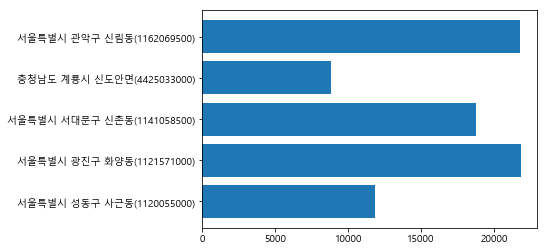

In [157]:
m = plt.barh(y.index, 총인구수[y.index])

#### - 지하철 시간대별 승하차 데이터, 티머니 홈페이지/이용안내/대중교통 통계자료/최근 월간 교통카드 통계자료

2. 선릉역과 삼성역에서 아침8~9시에 하차하는 인구수의 합을 구하세요

In [160]:
# 가산점
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949', index_col=3, skiprows=1)
df.shape

(597, 52)

In [162]:
data = df.iloc[:, 3:-1] # 가산점

In [163]:
data.head()

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,"1,148",21,"11,958","10,579","15,684","61,286","44,585","115,354","89,357","238,583",...,"37,939","22,083","4,127","7,762",3,548,0,0,0,0
시청,89,5,"2,843","4,674","4,169","24,963","8,926","74,288","11,999","207,024",...,"14,946","4,767",931,"1,426",1,25,0,0,0,0
종각,116,3,"4,576","5,233","4,780","33,366","7,695","108,663","12,735","295,205",...,"48,067","5,882","3,973","1,565",1,1,0,0,0,0
종로3가,216,16,"5,505","3,036","4,790","16,235","7,163","33,766","12,372","88,664",...,"29,318","6,715","3,375","2,753",1,37,0,1,0,0
종로5가,51,3,"2,245","4,205","3,415","19,150","6,140","46,654","10,238","132,023",...,"11,544","3,661",810,"1,200",0,6,0,0,0,0


In [164]:
data = data.replace(',','',regex=True)
data = data.astype(np.int)

In [167]:
data

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
시청,89,5,2843,4674,4169,24963,8926,74288,11999,207024,...,14946,4767,931,1426,1,25,0,0,0,0
종각,116,3,4576,5233,4780,33366,7695,108663,12735,295205,...,48067,5882,3973,1565,1,1,0,0,0,0
종로3가,216,16,5505,3036,4790,16235,7163,33766,12372,88664,...,29318,6715,3375,2753,1,37,0,1,0,0
종로5가,51,3,2245,4205,3415,19150,6140,46654,10238,132023,...,11544,3661,810,1200,0,6,0,0,0,0
동대문,776,12,17333,2452,12614,9043,19979,17282,26926,33995,...,9553,14421,1199,5052,1,68,0,0,0,0
신설동,315,38,11021,2103,11002,9714,22990,30373,32986,78975,...,6614,13402,681,3383,0,39,0,0,0,0
제기동,360,6,5600,2439,10512,10759,26059,22594,37545,50517,...,4686,9194,393,2120,0,0,0,0,0,0
청량리(서울시립대입구),1430,9,13965,3611,19600,13875,50958,22529,67407,47066,...,8555,20670,547,6585,0,2,0,1,0,0
동묘앞,136,11,3712,876,3992,4354,7349,13980,10925,33547,...,2725,5014,304,3516,5,298,0,0,0,0


In [202]:
sl = np.sum(data.loc['선릉'])
sm = data.loc['삼성(무역센터)']

In [188]:
data.iloc[:, 9].loc['선릉']

선릉    321238
선릉    145427
Name: 하차.4, dtype: int32

In [189]:
data.iloc[:, 9].loc['삼성(무역센터)']

372585

In [194]:
np.sum(data.iloc[:, 9].loc['선릉'])

466665

In [197]:
'선릉역과 삼성역에서 아침8~9시에 하차하는 인구수의 합=', data.iloc[:, 9].loc['삼성(무역센터)'] + np.sum(data.iloc[:, 9].loc['선릉'])

('선릉역과 삼성역에서 아침8~9시에 하차하는 인구수의 합=', 839250)

3. 시간대별로 삼성역과 선릉역의 지하철 승하차 현황을 그래프로 표현하세요. 

   총 4개의 그래프를 겹쳐서 그립니다. 

   삼성역의 승차 그래프, 삼성역의 하차 그래프, 선릉역의 승차 그래프, 선릉역의 하차 그래프)

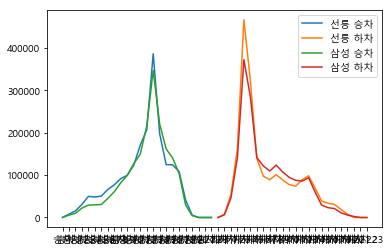

In [229]:
m = plt.plot(sl.index[::2], sl[::2], label='선릉 승차')
m = plt.plot(sl.index[1::2], sl[1::2], label='선릉 하차') 
m = plt.plot(sm.index[::2], sm[::2], label='삼성 승차')
m = plt.plot(sm.index[1::2], sm[1::2], label='삼성 하차')
m = plt.legend()

4. 유임 승차에 비해 무임 승차 인원의 비율이 높은 지하철역 5개의 이름과 비율을 그래프로 나타내세요.

In [223]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=2, encoding='cp949', index_col=3, skiprows=0)
df.shape

(597, 8)

In [224]:
df.head()
subway = df.iloc[:, 3:-1]
subway = subway.replace(',','',regex=True) 
subway = subway.astype('int')

In [230]:
subway

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107
시청,709821,727110,112279,112016
종각,1204910,1151371,176083,164915
종로3가,699000,647664,408682,382809
종로5가,561662,578374,307515,295535
동대문,338565,385522,151904,158360
신설동,386676,376451,131597,126524
제기동,297370,286647,353695,375436
청량리(서울시립대입구),480600,499265,336216,341637


In [225]:
유임승차 = subway['유임승차']
무임승차 = subway['무임승차']
비율 = 무임승차/유임승차

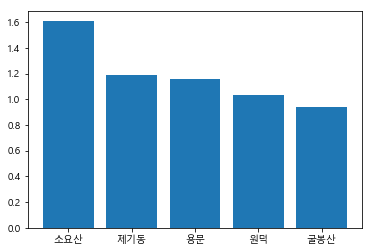

In [227]:
y = 비율.sort_values(ascending=False)[:5]
m = plt.bar(y.index, y)

#### - 웹 데이터 획득하기 

5. 네이버 금융/국내 증시/시가총액/코스피 에서 상위 종목 50개 데이터를 획득합니다. 오전 9시이후에 나타납니다

   (현재는 1. 삼성전자 2. SK 하이닉스 3.삼성전자우 4.현대차 5. 셀트리온 순서입니다)

   데이터를 획득하고 5~8행 등을 살펴 보면 NaN 행이 여럿 들어가 있습니다. 

   이렇게 잘못된 데이터(NaN)를 모두 제거하고 종목명을 index로 해서 화면에 데이터를 출력하세요.

   힌트 : dropna() 함수는 NaN 하나만 있어도 그 행을 모두 지워버립니다.

In [231]:
df = pd.read_html('https://finance.naver.com/sise/sise_market_sum.nhn', header=0, index_col=0)

In [232]:
df

[          ¸Å¼öÈ£°¡    °Å·¡´ë±Ý(¹é¸¸)  ½Ã°¡ÃÑ¾×(¾ï)      ¿µ¾÷ÀÌÀÍ(¾ï)  \
 °Å·¡·®                                                                 
 ½Ã°¡      ¸ÅµµÈ£°¡        ÀüÀÏ°Å·¡·®  ÀÚ»êÃÑ°è(¾ï)    ¿µ¾÷ÀÌÀÍÁõ°¡À²   
 °í°¡    ¸Å¼öÃÑÀÜ·®        ¿Ü±¹ÀÎºñÀ²  ºÎÃ¤ÃÑ°è(¾ï)    ´ç±â¼øÀÌÀÍ(¾ï)   
 Àú°¡    ¸ÅµµÃÑÀÜ·®  »óÀåÁÖ½Ä¼ö(ÃµÁÖ)    ¸ÅÃâ¾×(¾ï)    ÁÖ´ç¼øÀÌÀÍ(¿ø)   
 NaN            NaN               NaN  ¸ÅÃâ¾×Áõ°¡À²  º¸ÅëÁÖ¹è´ç±Ý(¿ø)   
 
           PER(¹è)  
 °Å·¡·®             
 ½Ã°¡       ROE(%)  
 °í°¡       ROA(%)  
 Àú°¡      PBR(¹è)  
 NaN     À¯º¸À²(%)  ,
                 Á¾¸ñ¸í     ÇöÀç°¡   ÀüÀÏºñ  µî¶ô·ü  ¾×¸é°¡   ½Ã°¡ÃÑ¾×  \
 N                                                                       
 NaN                NaN        NaN      NaN     NaN     NaN        NaN   
 1.0           »ï¼ºÀüÀÚ    45700.0    100.0  +0.22%   100.0  2728191.0   
 2.0         SKÇÏÀÌ´Ð½º    68700.0   2000.0  +3.00%  5000.0   500138.0   
 3.0         »ï¼ºÀüÀÚ¿ì    37550.0    100.0  +0.27%   100.0   3

In [233]:
len(df)

3

In [235]:
data = df[1]

In [248]:
new_data = data.iloc[:,:-1].dropna()

In [249]:
new_data

,Á¾¸ñ¸í,ÇöÀç°¡,ÀüÀÏºñ,µî¶ô·ü,¾×¸é°¡,½Ã°¡ÃÑ¾×,»óÀåÁÖ½Ä¼ö,¿Ü±¹ÀÎºñÀ²,°Å·¡·®,PER,ROE
N,,,,,,,,,,,
1.0,»ï¼ºÀüÀÚ,45700.0,100.0,+0.22%,100.0,2728191.0,5969783.0,57.15,3021293.0,7.59,19.63
2.0,SKÇÏÀÌ´Ð½º,68700.0,2000.0,+3.00%,5000.0,500138.0,728002.0,50.20,2434661.0,3.22,38.53
4.0,Çö´ëÂ÷,141500.0,0.0,0.00%,5000.0,302340.0,213668.0,44.37,63564.0,26.44,2.20
5.0,¼¿Æ®¸®¿Â,209000.0,1000.0,+0.48%,1000.0,268208.0,128329.0,21.16,85128.0,102.00,10.84
6.0,LGÈ­ÇÐ,348500.0,3500.0,-0.99%,5000.0,246014.0,70592.0,38.81,27981.0,18.53,8.86
7.0,Çö´ë¸ðºñ½º,233500.0,1500.0,+0.65%,5000.0,222541.0,95307.0,47.89,61066.0,12.03,6.30
8.0,POSCO,242500.0,2500.0,-1.02%,5000.0,211428.0,87187.0,54.11,35576.0,12.51,3.88
9.0,½ÅÇÑÁöÁÖ,44450.0,500.0,-1.11%,5000.0,210782.0,474200.0,67.35,367892.0,6.68,9.21
10.0,SKÅÚ·¹ÄÞ,259500.0,500.0,+0.19%,500.0,209535.0,80746.0,40.54,25538.0,6.70,15.52
